In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
import math
import scipy.constants as const

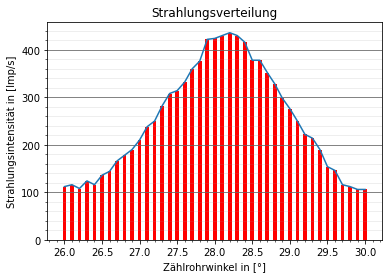

In [16]:
ThetaGMr=np.genfromtxt('bragg.dat', usecols=(1))
NBraggr=np.genfromtxt('bragg.dat', usecols=(2))
NBragg=NBraggr*2
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')

plt.bar(ThetaGM,NBragg, width=0.05, color='r')
plt.title('Strahlungsverteilung')
plt.ylabel('Strahlungsintensität in [Imp/s]')
plt.xlabel('Zählrohrwinkel in [°]')
plt.savefig('Braggwinkel.pdf')

K Alpha Peak: 1599.0 1.3908611455660976e-10
K Beta Peak: 5050.0 1.5414488655665816e-10
799.5
2525.0
291.0 1.3776571373157935e-10 425.0 1.417218159774139e-10
536.0 1.5284494105828324e-10 901.0 1.5673912711647506e-10


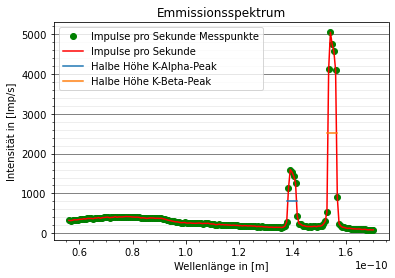

In [85]:

ThetaEm=np.genfromtxt('Emissionsspektrum.dat', usecols=(0))
ThetaEmRAD=ThetaEm*math.pi/180
Nem=np.genfromtxt('Emissionsspektrum.dat', usecols=(1))
d=201.4e-12
Lamda=2*d*np.sin(ThetaEmRAD)
NemOU=Nem
Kalpha=122
Kbeta=145
print('K Alpha Peak:',NemOU[Kalpha],Lamda[Kalpha])
print('K Beta Peak:',NemOU[Kbeta],Lamda[Kbeta])
print(NemOU[Kalpha]/2)
print(NemOU[Kbeta]/2)
x = np.linspace(1.3776571373157935e-10, 1.417218159774139e-10)
y = np.linspace(1.5284494105828324e-10, 1.5673912711647506e-10)
E=const.h*const.c/Lamda/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.plot(Lamda,Nem, 'go',label='Impulse pro Sekunde Messpunkte')
plt.plot(Lamda,Nem, color='r',label='Impulse pro Sekunde')
plt.plot(x,NemOU[Kalpha]/2*x/x, label='Halbe Höhe K-Alpha-Peak')
plt.plot(y,NemOU[Kbeta]/2*y/y,label='Halbe Höhe K-Beta-Peak')
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in [Imp/s]')
plt.xlabel('Wellenlänge in [m]')
plt.savefig('Emmisionssprktrum.pdf')
print(NemOU[Kalpha-2],Lamda[Kalpha-2],NemOU[Kalpha+4],Lamda[Kalpha+4])
print(NemOU[Kbeta-2],Lamda[Kbeta-2],NemOU[Kbeta+4],Lamda[Kbeta+4])

K Alpha Peak: 1599.0 8.914203896517447  KeV
K Beta Peak: 5050.0 8.04335461284524  KeV
K Alpha halbe: 799.5 8.914203896517447  KeV
K Beta halbe: 2525.0 8.04335461284524  KeV
E-Alpha +: 8.999641135295043 KeV
E-Alpha -: 8.748420105833214 KeV
E-Beta +: 8.111763305657744 KeV
E-Beta -: 7.910226419792798 KeV
Delta E-Alpha: 0.25122102946182895 Kev
Delta E-Beta: 0.20153688586494628 Kev


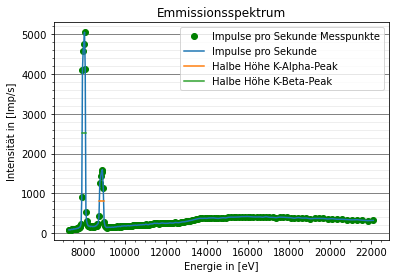

In [101]:
a=const.h*const.c/x/const.e
b=const.h*const.c/y/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.plot(E,Nem,'go',label='Impulse pro Sekunde Messpunkte')
plt.plot(E,Nem,label='Impulse pro Sekunde')
plt.plot(a,NemOU[Kalpha]/2*a/a, label='Halbe Höhe K-Alpha-Peak')
plt.plot(b,NemOU[Kbeta]/2*b/b,label='Halbe Höhe K-Beta-Peak')
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in [Imp/s]')
plt.xlabel('Energie in [eV]')
plt.savefig('EmmisionssprktrumII.pdf')
print('K Alpha Peak:',NemOU[Kalpha],const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta Peak:',NemOU[Kbeta],const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('K Alpha halbe:',NemOU[Kalpha]/2,const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta halbe:',NemOU[Kbeta]/2,const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('E-Alpha +:',const.h*const.c/const.e/1000/Lamda[Kalpha-2],'KeV')
print('E-Alpha -:',const.h*const.c/const.e/1000/Lamda[Kalpha+4],'KeV')
print('E-Beta +:',const.h*const.c/const.e/1000/Lamda[Kbeta-2],'KeV')
print('E-Beta -:',const.h*const.c/const.e/1000/Lamda[Kbeta+4],'KeV')
print('Delta E-Alpha:',(const.h*const.c/const.e/(Lamda[Kalpha-2])-(const.h*const.c/const.e/Lamda[Kalpha+4]))/1000,'Kev')
print('Delta E-Beta:',(const.h*const.c/const.e/(Lamda[Kbeta-2])-(const.h*const.c/const.e/Lamda[Kbeta+4]))/1000,'Kev')


In [108]:
#Berechnung des Auflösungsvermögens
DEAlpha=(const.h*const.c/const.e/(Lamda[Kalpha-2])-(const.h*const.c/const.e/Lamda[Kalpha+4]))/1000
DEBeta=(const.h*const.c/const.e/(Lamda[Kbeta-2])-(const.h*const.c/const.e/Lamda[Kbeta+4]))/1000
EKAlpha=(const.h*const.c/Lamda[Kalpha]/const.e/1000)
EKBeta=(const.h*const.c/Lamda[Kbeta]/const.e/1000)
print('Alpha A=',EKAlpha/DEAlpha)
print('Beta A=',EKBeta/DEBeta)

Alpha A= 35.48350994187726
Beta A= 39.91008682269332
